In [1]:
%matplotlib inline 
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy

**PNC:/Users/haas/opt/anaconda3/envs/plotting/lib/python3.8/site-packages/PseudoNetCDF/pncwarn.py:24:UserWarning:
  pyproj could not be found, so IO/API coordinates cannot be converted to lat/lon; to fix, install pyproj or basemap (e.g., `pip install pyproj)`


In [2]:
!date

Mo 27 Sep 2021 20:58:46 CEST


In [3]:
!ls output/


dk_0_ecosystem-yearly.txt     dk_0_report-harvest.txt
dk_0_physiology-daily.txt     dk_0_report-manure.txt
dk_0_report-cut.txt           dk_0_soilchemistry-daily.txt
dk_0_report-fertilize.txt     dk_0_soilchemistry-yearly.txt
dk_0_report-graze.txt         dk_0_watercycle-daily.txt


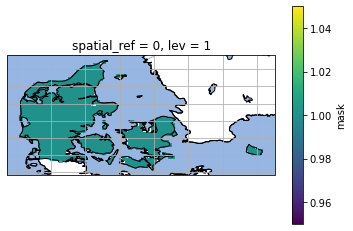

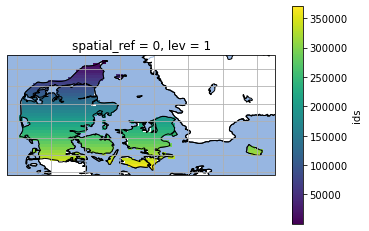

In [4]:
mask = xr.open_dataset("sites_HR.nc")
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black', facecolor='none')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.BORDERS)
ax.gridlines()
ax.coastlines(resolution='10m')
mask.mask.where(mask.mask == 1).plot(ax = ax)
plt.show()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black', facecolor='none')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.BORDERS)
ax.gridlines()
ax.coastlines(resolution='10m')
mask.ids.where(mask.mask == 1).plot(ax=ax)

In [10]:
dfids = mask.ids.where(mask.mask == 1).to_dataframe() 
dfids = dfids[ dfids.ids > 0 ]
dfids.reset_index( inplace = True )
dfids.set_index(["ids"], inplace = True )
dfids.head()

,lat,lon,spatial_ref,lev
ids,,,,
370046.0,54.625000,11.958333,0,1
360038.0,54.708333,11.291667,0,1
360039.0,54.708333,11.375000,0,1
360040.0,54.708333,11.458333,0,1
360041.0,54.708333,11.541667,0,1


In [30]:
df = pd.read_csv("output/dk_0_soilchemistry-yearly.txt", sep="\t")
df.set_index("id", inplace = True )
df["lat"] = dfids.lat
df["lon"] = dfids.lon
df["year"] = pd.to_datetime(df.datetime).dt.year
df.set_index(["lat","lon","year"], inplace = True )
df.head()

source             datetime  aC_ch4_emis[kgCha-1]  \
lat       lon       year                                                     
57.708333 10.541667 2000  setup  2000-12-31 00:00:00                     0   
                    2001  setup  2001-12-31 00:00:00                     0   
                    2002  setup  2002-12-31 00:00:00                     0   
                    2003  setup  2003-12-31 00:00:00                     0   
                    2004  setup  2004-12-31 00:00:00                     0   

                          aC_co2_emis_auto[kgCha-1]  \
lat       lon       year                              
57.708333 10.541667 2000                    2449.83   
                    2001                    2223.04   
                    2002                    2606.26   
                    2003                    3525.59   
                    2004                    2191.88   

                          aC_co2_emis_hetero[kgCha-1]  aC_doc_leach[kgCha-1]  \
lat       lon       year                                                       
57.708333 10.541667 2000                      721.919                7.57385   
                    2001                     1240.370              394.80500   
                    2002                     1306.660               76.39240   
                    2003                     1844.430              269.35800   
                    2004                     1811.030               17.51620   

                          aC_litter_above[kgCha-1]  aC_litter_below[kgCha-1]  \
lat       lon       year                                                       
57.708333 10.541667 2000                   1204.81                   445.071   
                    2001                   1259.63                  1832.920   
                    2002                   1224.77                   440.968   
                    2003                   1133.68                  1852.850   
                    2004                   1154.76                   407.226   

                          aC_fertilize[kgCha-1]  aC_fixation[kgCha-1]  ...  \
lat       lon       year                                               ...   
57.708333 10.541667 2000                 720.37                     0  ...   
                    2001                 671.18                     0  ...   
                    2002                 720.37                     0  ...   
                    2003                 671.18                     0  ...   
                    2004                 720.37                     0  ...   

                          N_wood_above[kgNha-1]  N_wood_below[kgNha-1]  \
lat       lon       year                                                 
57.708333 10.541667 2000                      0                      0   
                    2001                      0                      0   
                    2002                      0                      0   
                    2003                      0                      0   
                    2004                      0                      0   

                          N_soil_total[kgNha-1]  N_soil_floor[kgNha-1]  \
lat       lon       year                                                 
57.708333 10.541667 2000                6145.16                    0.0   
                    2001                6211.26                    0.0   
                    2002                6288.69                    0.0   
                    2003                6351.32                    0.0   
                    2004                6405.73                    0.0   

                          N_soil_min[kgNha-1]  N_soil_min_30cm[kgNha-1]  \
lat       lon       year                                                  
57.708333 10.541667 2000              6145.16                   2319.11   
                    2001              6211.26                   2368.49   
                    2002              6288.69                   2412.31   
          

In [16]:
dsSC = mask

In [ ]:
dsnew = dsSC.from_dataframe(df)

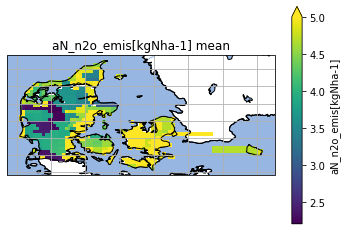

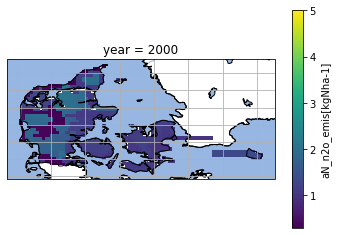

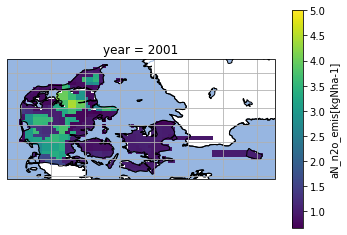

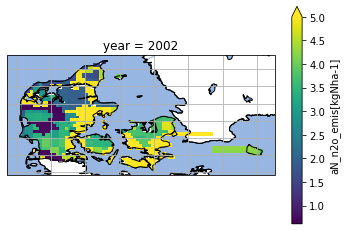

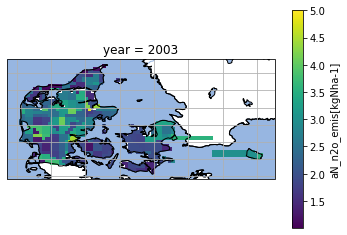

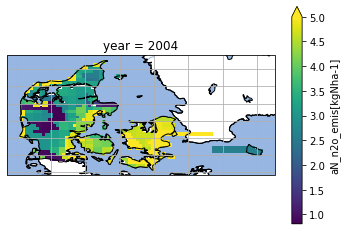

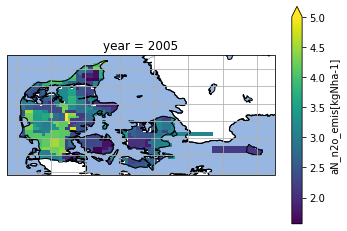

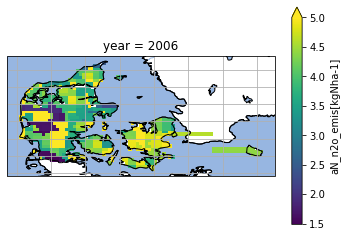

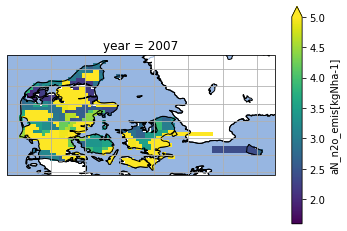

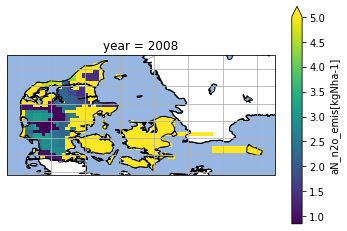

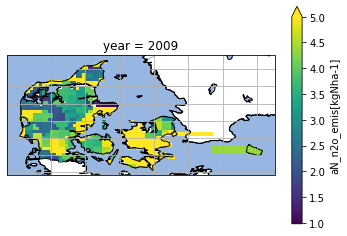

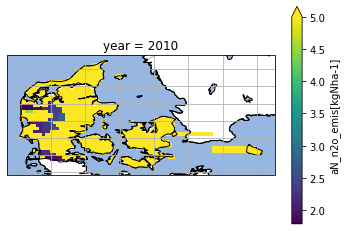

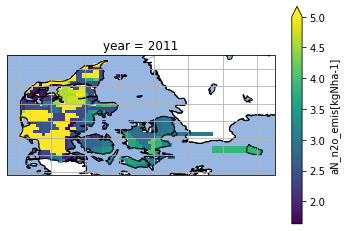

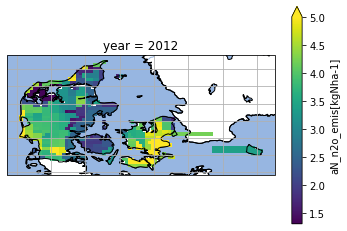

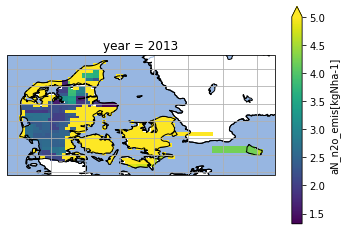

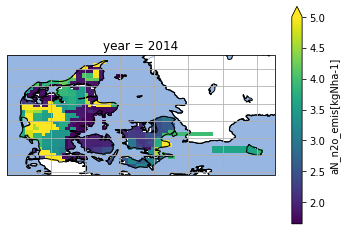

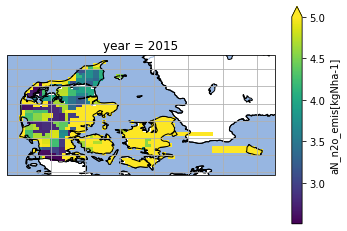

In [31]:
var = "aN_n2o_emis[kgNha-1]"
vmax= 5.

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black', facecolor='none')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.BORDERS)
ax.gridlines()
ax.coastlines(resolution='10m')

dsnew.where(mask.mask == 1)[var].mean(dim="year").plot( ax = ax, vmax=vmax )
plt.title(var + " mean")
plt.show()

for year in list(range(2000,2016)):
    ax = plt.axes(projection=ccrs.PlateCarree())

    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.LAND, edgecolor='black', facecolor='none')
    ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
    ax.add_feature(cartopy.feature.RIVERS)
    ax.add_feature(cartopy.feature.BORDERS)
    ax.gridlines()
    ax.coastlines(resolution='10m')

    dsnew[var].sel(year=year).plot( ax = ax , vmax = vmax )
    plt.show()

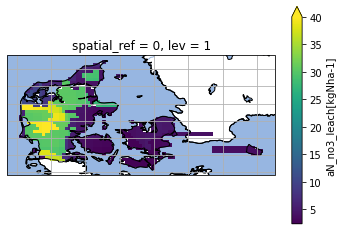

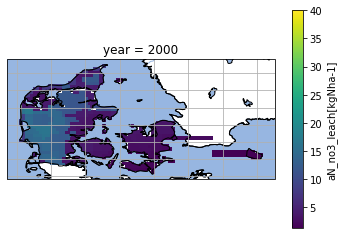

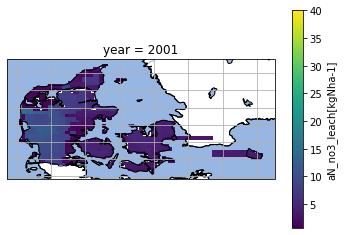

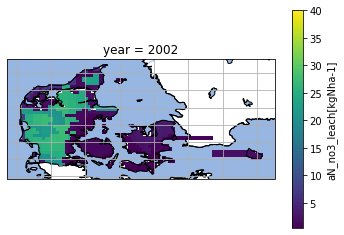

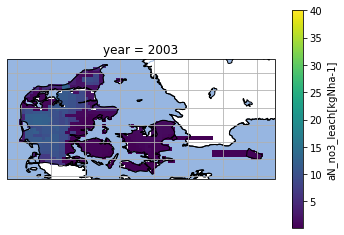

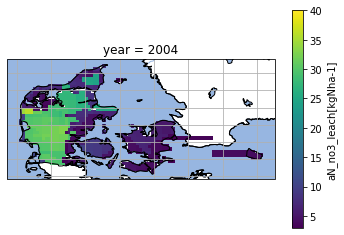

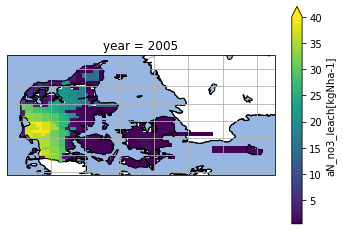

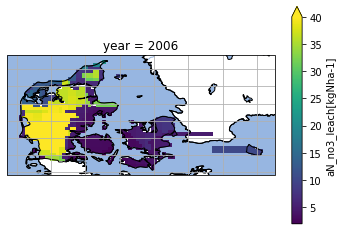

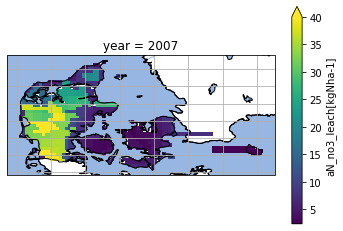

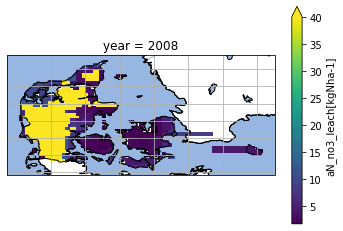

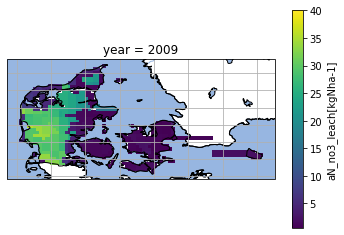

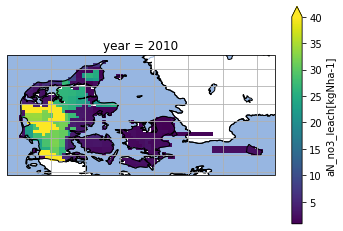

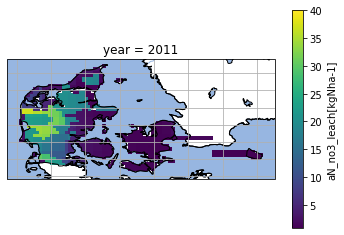

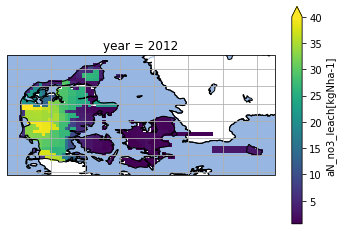

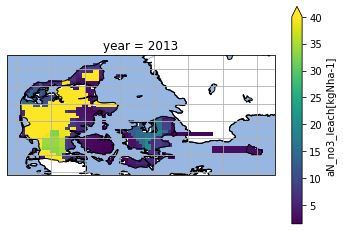

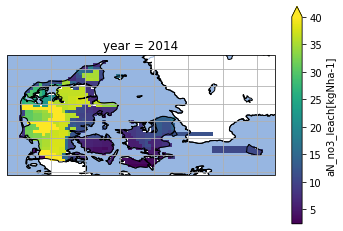

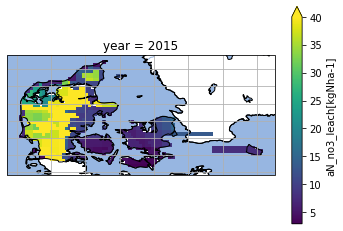

In [33]:
var = "aN_no3_leach[kgNha-1]"
vmax = 40 

ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black', facecolor='none')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.BORDERS)
ax.gridlines()
ax.coastlines(resolution='10m')

dsnew.where(mask.mask == 1)[var].mean(dim="year").plot( ax = ax, vmax = vmax ) 
plt.show()

for year in list(range(2000,2016)):
    ax = plt.axes(projection=ccrs.PlateCarree())

    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.LAND, edgecolor='black', facecolor='none')
    ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
    ax.add_feature(cartopy.feature.RIVERS)
    ax.add_feature(cartopy.feature.BORDERS)
    ax.gridlines()
    ax.coastlines(resolution='10m')

    dsnew[var].sel(year=year).plot( ax = ax , vmax = vmax )
    plt.show()

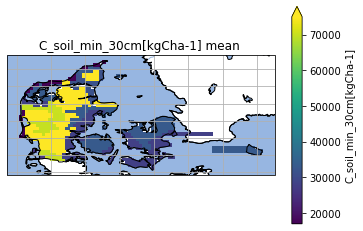

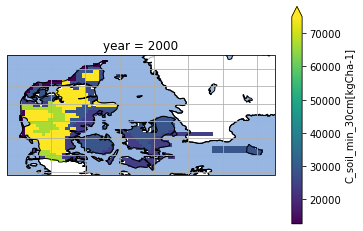

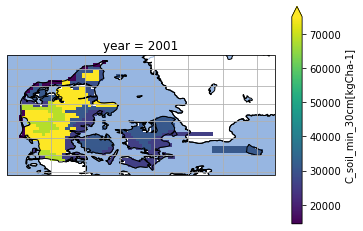

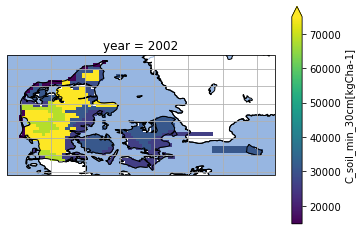

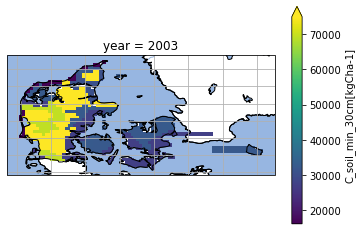

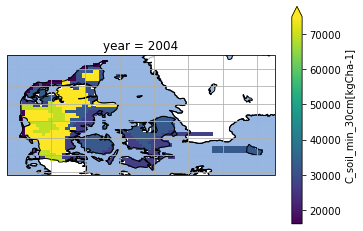

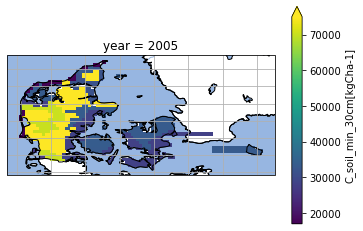

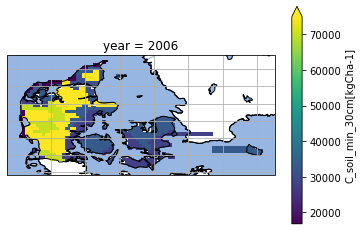

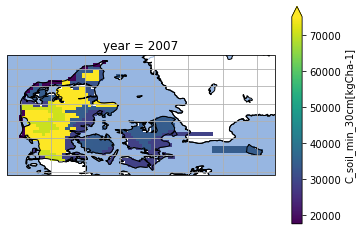

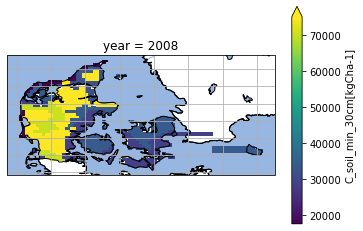

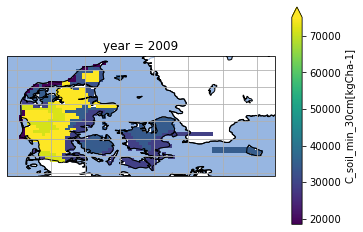

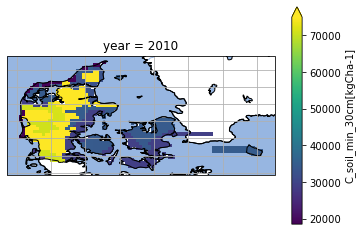

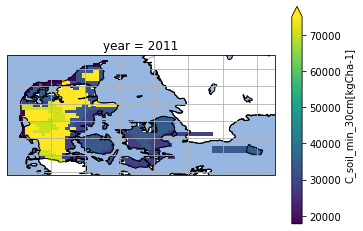

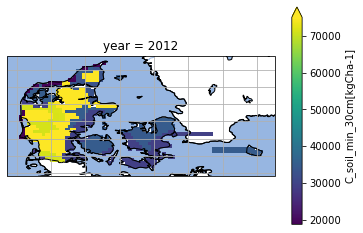

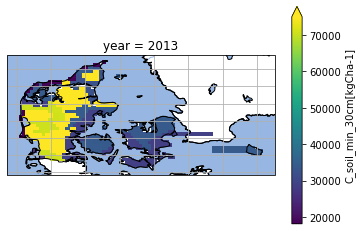

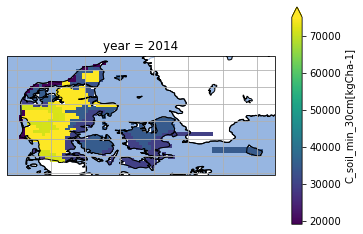

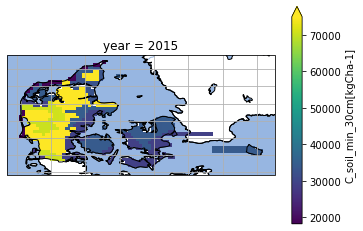

In [34]:
var = "C_soil_min_30cm[kgCha-1]"
vmax = 75000

ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black', facecolor='none')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.BORDERS)
ax.gridlines()
ax.coastlines(resolution='10m')

dsnew.where(mask.mask == 1)[var].mean(dim="year").plot( ax = ax , vmax = vmax )
plt.title(var + " mean ")
plt.show()

for year in list(range(2000,2016)):
    ax = plt.axes(projection=ccrs.PlateCarree())

    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.LAND, edgecolor='black', facecolor='none')
    ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
    ax.add_feature(cartopy.feature.RIVERS)
    ax.add_feature(cartopy.feature.BORDERS)
    ax.gridlines()
    ax.coastlines(resolution='10m')

    dsnew[var].sel(year=year).plot( ax = ax , vmax = vmax )
    plt.show()